In [1]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/98/42/5238e5a623381a51574e3f8d4710a31bff7fe0a580e265c04e82cdc5eb22/holidays-0.59-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed0

In [6]:
import pandas as pd
from prophet import Prophet

data = pd.read_csv(r"C:\Users\rgowt\Downloads\Time Series forecast.csv", parse_dates=['Date'], dayfirst=True)  

service_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']


In [7]:
train_data = data.iloc[:-7]  
test_data = data.iloc[-7:]   


11:29:39 - cmdstanpy - INFO - Chain [1] start processing
11:29:39 - cmdstanpy - INFO - Chain [1] done processing


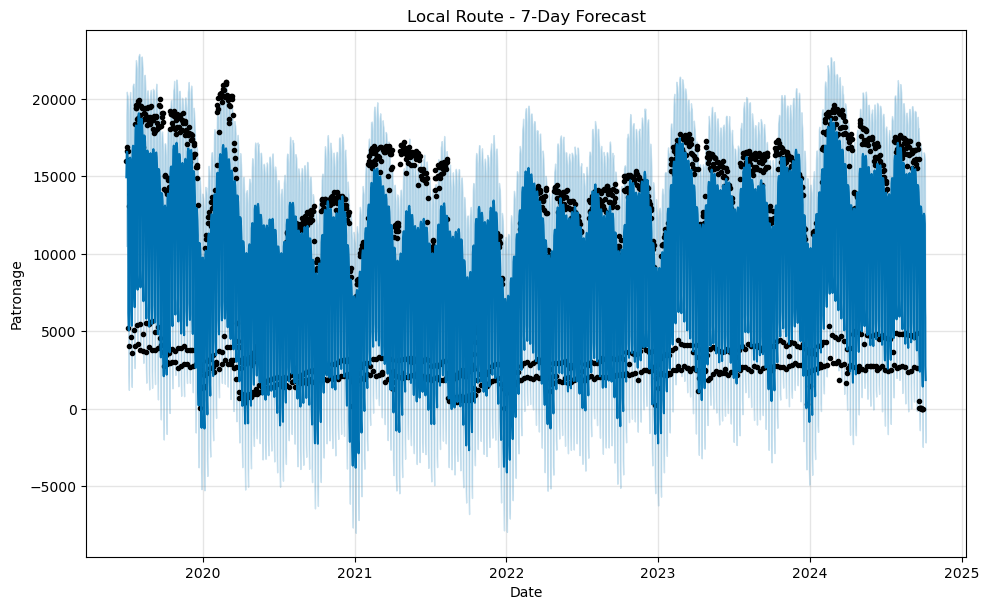

11:29:43 - cmdstanpy - INFO - Chain [1] start processing
11:29:43 - cmdstanpy - INFO - Chain [1] done processing


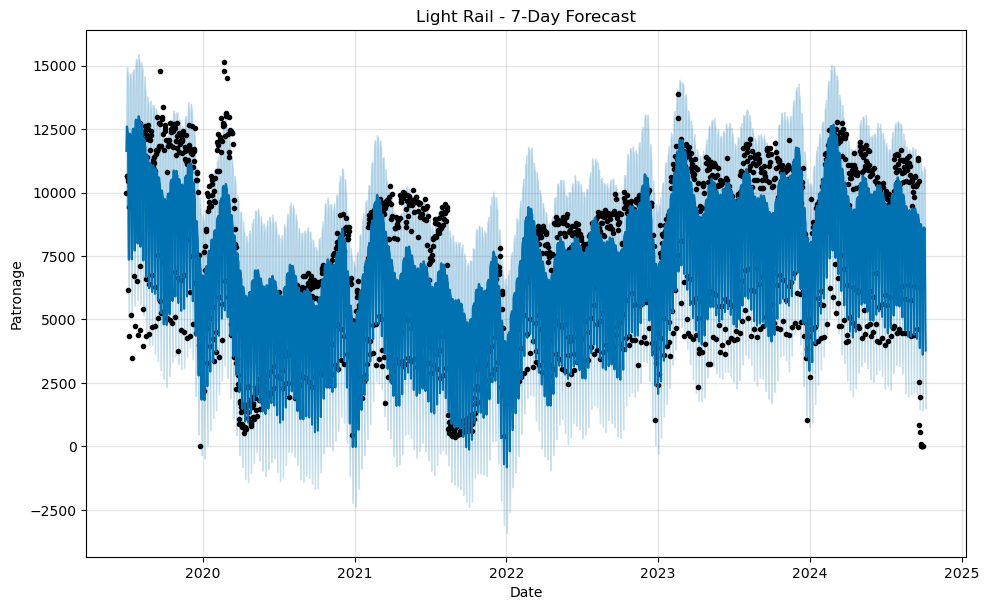

11:29:46 - cmdstanpy - INFO - Chain [1] start processing
11:29:47 - cmdstanpy - INFO - Chain [1] done processing


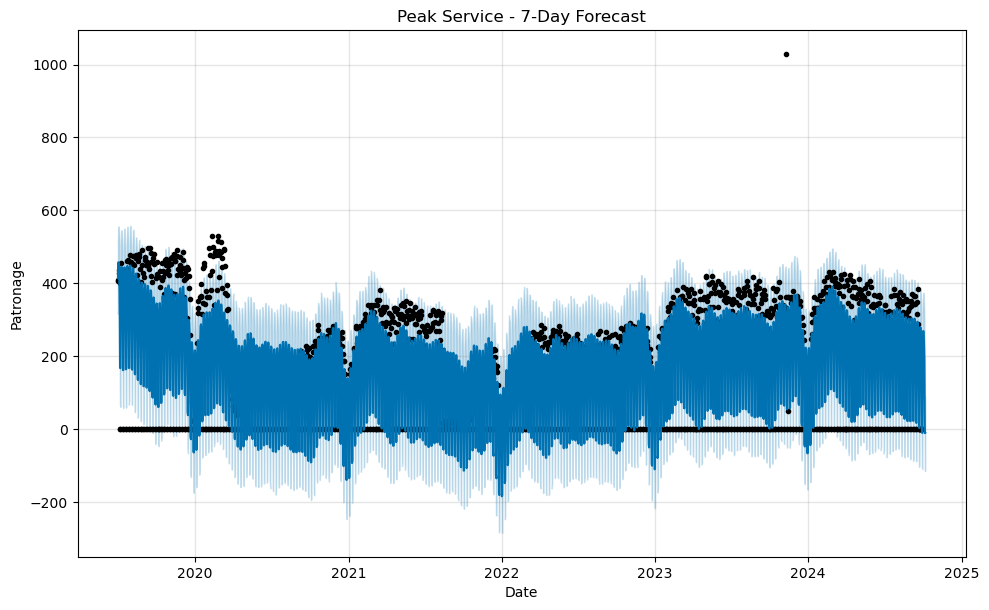

11:29:50 - cmdstanpy - INFO - Chain [1] start processing
11:29:50 - cmdstanpy - INFO - Chain [1] done processing


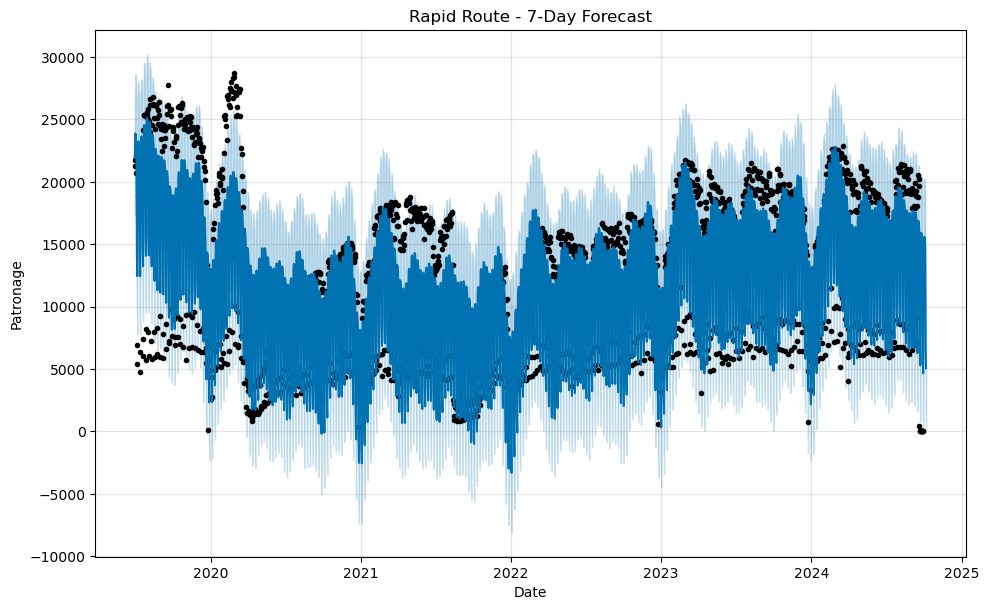

11:29:54 - cmdstanpy - INFO - Chain [1] start processing
11:29:54 - cmdstanpy - INFO - Chain [1] done processing


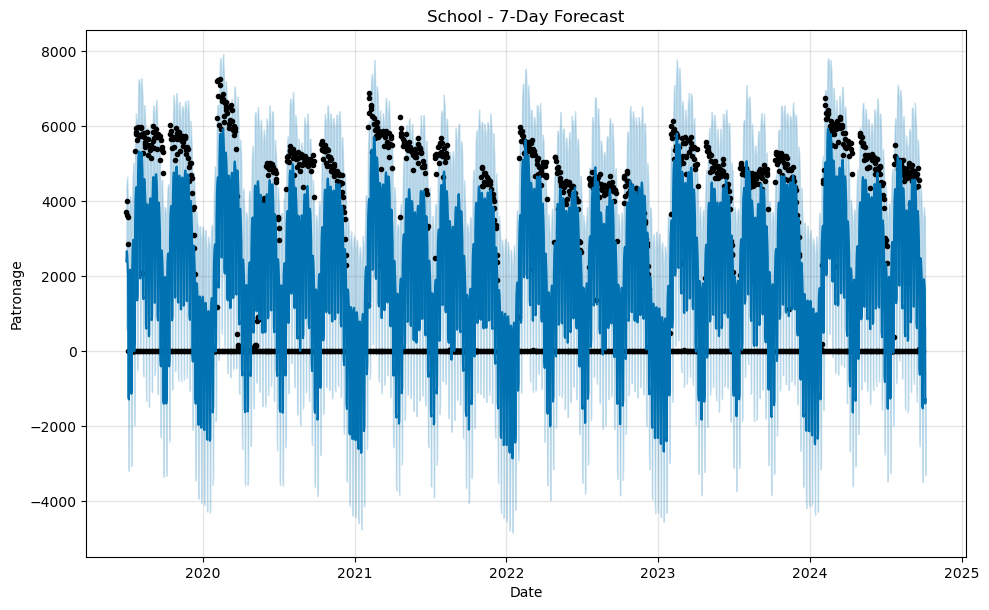

11:29:57 - cmdstanpy - INFO - Chain [1] start processing
11:29:57 - cmdstanpy - INFO - Chain [1] done processing


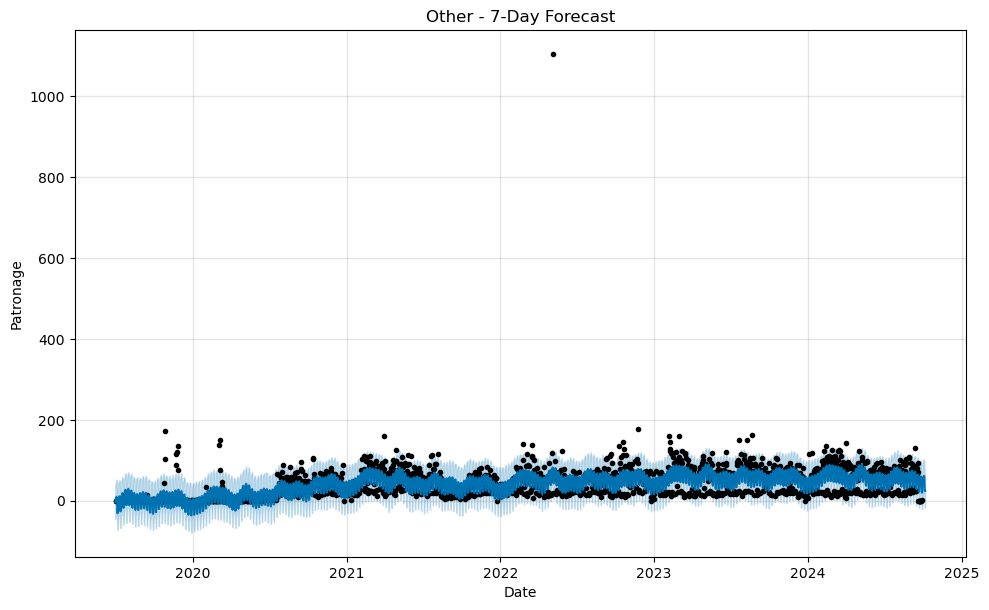

In [8]:
import matplotlib.pyplot as plt
forecasts = {}

for column in service_columns:
    df_train = train_data[['Date', column]].rename(columns={'Date': 'ds', column: 'y'})

    model = Prophet(daily_seasonality=True)
    model.fit(df_train)

    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)

    forecasts[column] = forecast[['ds', 'yhat']].tail(7)
    
    model.plot(forecast)
    plt.title(f'{column} - 7-Day Forecast')
    plt.xlabel('Date')
    plt.ylabel('Patronage')
    plt.show()


In [10]:
import pandas as pd
from prophet import Prophet
data = pd.read_csv(r"C:\Users\rgowt\Downloads\Time Series forecast.csv", parse_dates=['Date'], dayfirst=True)  
service_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

forecasts = {}

for column in service_columns:
    df_train = data[['Date', column]].rename(columns={'Date': 'ds', column: 'y'})

    model = Prophet(daily_seasonality=True)
    model.fit(df_train)

    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)

    forecasts[column] = forecast[['ds', 'yhat']].tail(7)
    
for service, forecast_data in forecasts.items():
    print(f"Forecast for {service} for the next 7 days:")
    print(forecast_data)
    print("\n")


11:31:43 - cmdstanpy - INFO - Chain [1] start processing
11:31:44 - cmdstanpy - INFO - Chain [1] done processing
11:31:46 - cmdstanpy - INFO - Chain [1] start processing
11:31:46 - cmdstanpy - INFO - Chain [1] done processing
11:31:48 - cmdstanpy - INFO - Chain [1] start processing
11:31:49 - cmdstanpy - INFO - Chain [1] done processing
11:31:51 - cmdstanpy - INFO - Chain [1] start processing
11:31:52 - cmdstanpy - INFO - Chain [1] done processing
11:31:54 - cmdstanpy - INFO - Chain [1] start processing
11:31:54 - cmdstanpy - INFO - Chain [1] done processing
11:31:56 - cmdstanpy - INFO - Chain [1] start processing
11:31:57 - cmdstanpy - INFO - Chain [1] done processing


Forecast for Local Route for the next 7 days:
             ds          yhat
1918 2024-09-30  10579.922575
1919 2024-10-01  12375.776354
1920 2024-10-02  12540.870815
1921 2024-10-03  12391.129935
1922 2024-10-04  11862.335264
1923 2024-10-05   2715.001207
1924 2024-10-06   1790.610792


Forecast for Light Rail for the next 7 days:
             ds         yhat
1918 2024-09-30  7555.557183
1919 2024-10-01  8609.471383
1920 2024-10-02  8652.099587
1921 2024-10-03  8571.437852
1922 2024-10-04  8601.483803
1923 2024-10-05  5137.582078
1924 2024-10-06  3780.016987


Forecast for Peak Service for the next 7 days:
             ds        yhat
1918 2024-09-30  224.720857
1919 2024-10-01  270.170128
1920 2024-10-02  269.948535
1921 2024-10-03  243.406709
1922 2024-10-04  191.757197
1923 2024-10-05  -10.124616
1924 2024-10-06   -8.728335


Forecast for Rapid Route for the next 7 days:
             ds          yhat
1918 2024-09-30  13450.872752
1919 2024-10-01  15557.138686
1920 2024-10-02  15643.2